In [ ]:
! pip install deepface
! pip install text2emotion

     |████████████████████████████████| 65 kB 2.1 MB/s 
     |████████████████████████████████| 2.3 MB 13.5 MB/s 
     |████████████████████████████████| 87 kB 6.1 MB/s 
     |████████████████████████████████| 60.5 MB 1.1 MB/s 
     |████████████████████████████████| 462 kB 51.1 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=0a52141dc5387a492d5c5b6d44cbfea82e3cffc3a811671d19c7f84b19c081cf
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have im

In [ ]:
from deepface import DeepFace
from google.colab import drive
import text2emotion as te
import glob
import numpy as np
import matplotlib.pyplot as plt

width = 1

# initialize a test image, used for generating the dictionaries
obj = DeepFace.analyze(img_path = "/content/drive/MyDrive/Colab/img1.jpg", actions = ['emotion'], enforce_detection=False)

drive.mount('/content/drive')

Directory  /root /.deepface created
Directory  /root /.deepface/weights created
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 69.9MB/s]


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Emotion: angry Score: 0.07633279603622944
Emotion: disgust Score: 3.635238581793936e-06
Emotion: fear Score: 0.2002971510522579
Emotion: happy Score: 0.11912505582161449
Emotion: sad Score: 0.28402422132052946
Emotion: surprise Score: 0.00012568976400055397
Emotion: neutral Score: 0.3200914410687229
Most dominant Emotion: neutral


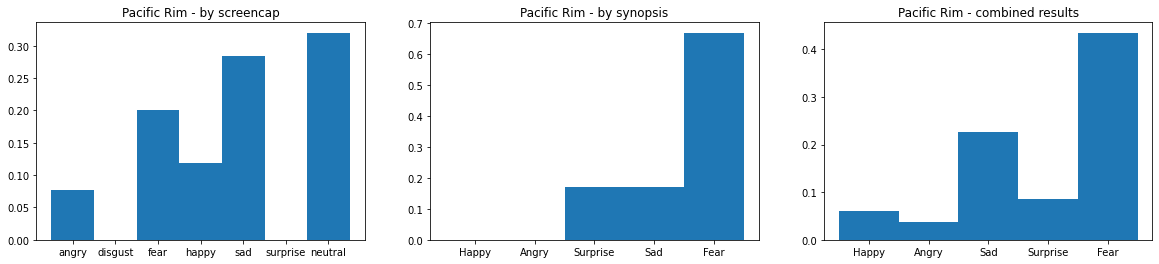

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/pacific/*")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "Long ago, legions of monstrous creatures called Kaiju arose from the sea, bringing with them all-consuming war. To fight the Kaiju, mankind developed giant robots called Jaegers, designed to be piloted by two humans locked together in a neural bridge. However, even the Jaegers are not enough to defeat the Kaiju, and humanity is on the verge of defeat. Mankind's last hope now lies with a washed-up ex-pilot (Charlie Hunnam), an untested trainee (Rinko Kikuchi) and an old, obsolete Jaeger."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("Pacific Rim - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("Pacific Rim - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("Pacific Rim - combined results")

plt.show()

Emotion: angry Score: 0.24748728431020267
Emotion: disgust Score: 1.5504416904457777e-05
Emotion: fear Score: 0.18612510250291656
Emotion: happy Score: 0.1173268213949169
Emotion: sad Score: 0.234328452940264
Emotion: surprise Score: 0.005138922157805124
Emotion: neutral Score: 0.20957791927794073
Most dominant Emotion: angry


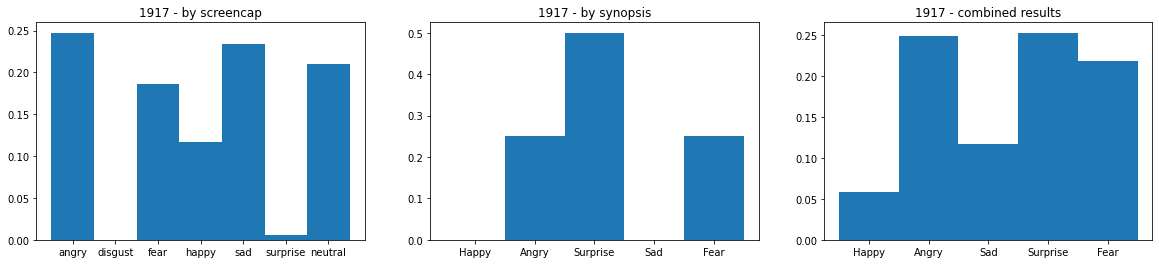

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/1917/*")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "During World War I, two British soldiers -- Lance Cpl. Schofield and Lance Cpl. Blake -- receive seemingly impossible orders. In a race against time, they must cross over into enemy territory to deliver a message that could potentially save 1,600 of their fellow comrades -- including Blake's own brother."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("1917 - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("1917 - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("1917 - combined results")

plt.show()

Emotion: angry Score: 0.16849340935218265
Emotion: disgust Score: 0.004805598892350658
Emotion: fear Score: 0.1435502559562848
Emotion: happy Score: 0.11914986116257119
Emotion: sad Score: 0.2782599912828335
Emotion: surprise Score: 0.0028905329223072153
Emotion: neutral Score: 0.2828503553243098
Most dominant Emotion: neutral


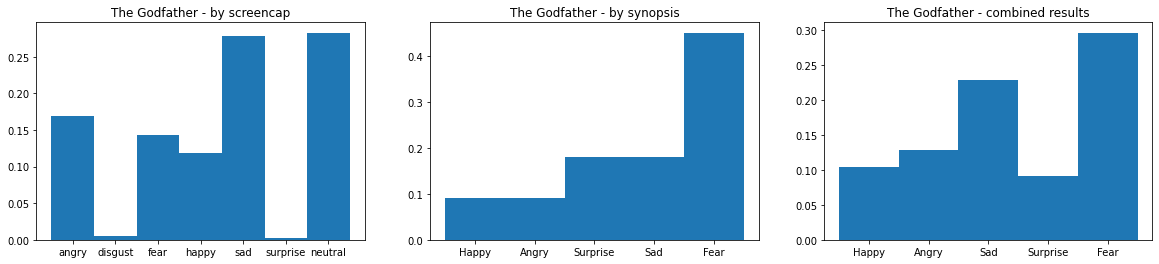

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/godfather/*")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "Widely regarded as one of the greatest films of all time, this mob drama, based on Mario Puzo's novel of the same name, focuses on the powerful Italian-American crime family of Don Vito Corleone (Marlon Brando). When the don's youngest son, Michael (Al Pacino), reluctantly joins the Mafia, he becomes involved in the inevitable cycle of violence and betrayal. Although Michael tries to maintain a normal relationship with his wife, Kay (Diane Keaton), he is drawn deeper into the family business."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("The Godfather - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("The Godfather - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("The Godfather - combined results")

plt.show()

Emotion: angry Score: 0.02462579834624529
Emotion: disgust Score: 2.9240985286617107e-05
Emotion: fear Score: 0.015433157843379617
Emotion: happy Score: 0.4628369025265696
Emotion: sad Score: 0.2268212337358629
Emotion: surprise Score: 0.033193166955295
Emotion: neutral Score: 0.23706050986520552
Most dominant Emotion: happy


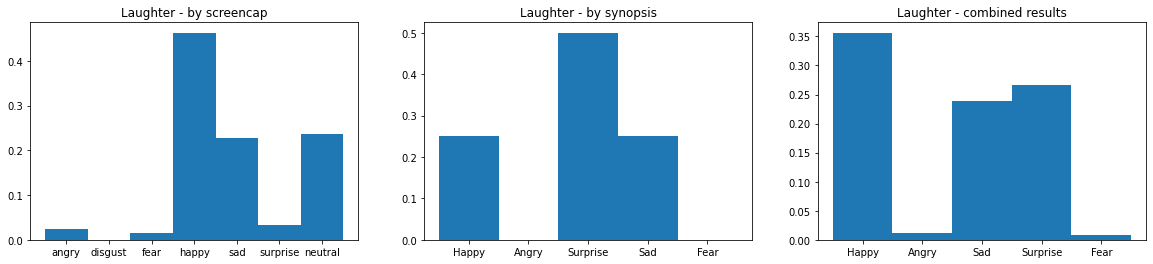

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/laughter/*")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "A friend and a boyfriend help a woman cope with a traumatizing incident from the past."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("Laughter - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("Laughter - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("Laughter - combined results")

plt.show()

Emotion: angry Score: 0.010031009278039816
Emotion: disgust Score: 0.00015176866466497932
Emotion: fear Score: 0.11375655168779002
Emotion: happy Score: 0.5824360548079888
Emotion: sad Score: 0.01958415588188403
Emotion: surprise Score: 0.11111926975171375
Emotion: neutral Score: 0.1629212019223175
Most dominant Emotion: happy


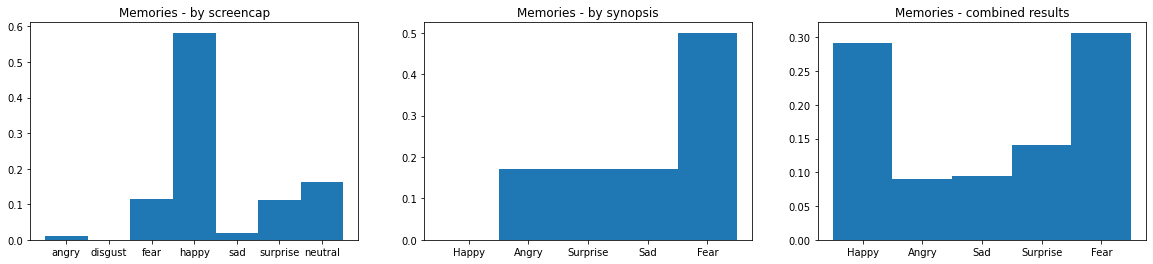

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/memories/*")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "Sam Alex becomes an alcoholic and takes a long leave after his wife and daughter are murdered. His mother is concerned he may die and asks him to crack a case of a serial killer who hangs victims from a cross."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("Memories - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("Memories - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("Memories - combined results")

plt.show()

Emotion: angry Score: 0.09194741120735073
Emotion: disgust Score: 0.004990460686037353
Emotion: fear Score: 0.28966164686605944
Emotion: happy Score: 0.09113650127322347
Emotion: sad Score: 0.40391365388780914
Emotion: surprise Score: 0.00015548815554863524
Emotion: neutral Score: 0.11819484948812858
Most dominant Emotion: sad


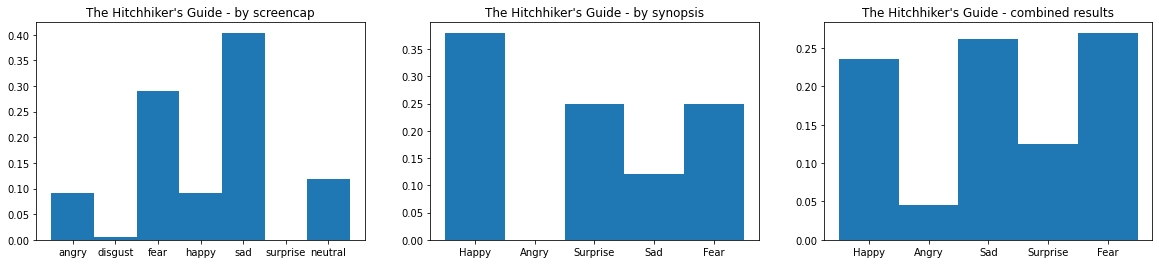

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/hitchhiker/*")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "Arthur Dent (Martin Freeman) is trying to prevent his house from being bulldozed when his friend Ford Prefect (Mos Def) whisks him into outer space. It turns out Ford is an alien who has just saved Arthur from Earth's total annihilation. Ford introduces Arthur to his myriad friends, including many-headed President Zaphod Beeblebrox (Sam Rockwell) and sexy refugee Trillian (Zooey Deschanel). Arthur makes his way across the stars while seeking the meaning of life, or something close to it"
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("The Hitchhiker's Guide - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("The Hitchhiker's Guide - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("The Hitchhiker's Guide - combined results")

plt.show()

Emotion: angry Score: 0.28751182556152344
Emotion: disgust Score: 5.470870405588357e-07
Emotion: fear Score: 0.005376089829951525
Emotion: happy Score: 0.20534904301166534
Emotion: sad Score: 0.4579392075538635
Emotion: surprise Score: 4.785572969012719e-07
Emotion: neutral Score: 0.04382285103201866
Most dominant Emotion: sad


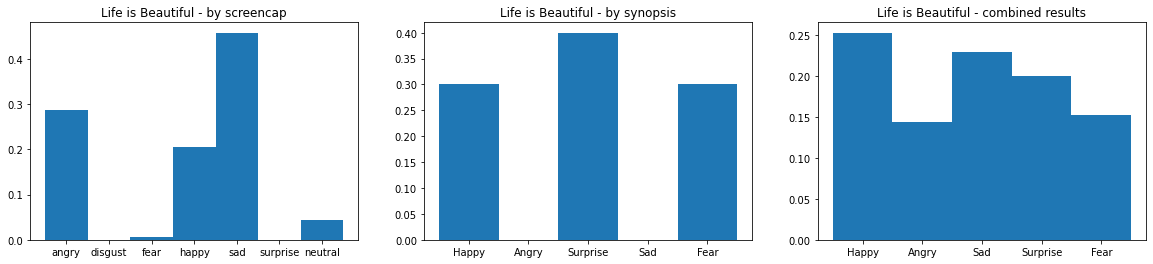

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/life-is-beautiful-1997-228.jpg")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "A gentle Jewish-Italian waiter, Guido Orefice (Roberto Benigni), meets Dora (Nicoletta Braschi), a pretty schoolteacher, and wins her over with his charm and humor. Eventually they marry and have a son, Giosue (Giorgio Cantarini). Their happiness is abruptly halted, however, when Guido and Giosue are separated from Dora and taken to a concentration camp. Determined to shelter his son from the horrors of his surroundings, Guido convinces Giosue that their time in the camp is merely a game."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("Life is Beautiful - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("Life is Beautiful - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("Life is Beautiful - combined results")

plt.show()

Emotion: angry Score: 0.001605829456821084
Emotion: disgust Score: 4.881850691162981e-05
Emotion: fear Score: 0.0022541366051882505
Emotion: happy Score: 0.6010801792144775
Emotion: sad Score: 0.009285260923206806
Emotion: surprise Score: 0.0002636965364217758
Emotion: neutral Score: 0.3854620158672333
Most dominant Emotion: happy


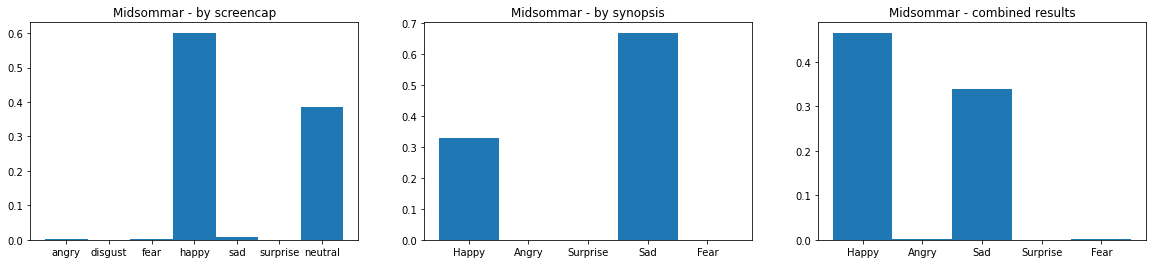

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/midsommar-2019-258-15692.jpg")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "A couple travel to Sweden to visit their friend's rural hometown for its fabled midsummer festival, but what begins as an idyllic retreat quickly devolves into an increasingly violent and bizarre competition at the hands of a pagan cult."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("Midsommar - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("Midsommar - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("Midsommar - combined results")

plt.show()

Emotion: angry Score: 5.227952442510286e-06
Emotion: disgust Score: 2.748111738171133e-10
Emotion: fear Score: 0.0005091319908387959
Emotion: happy Score: 0.9963555335998535
Emotion: sad Score: 0.003128120442852378
Emotion: surprise Score: 2.468484296969109e-07
Emotion: neutral Score: 1.7115764876507455e-06
Most dominant Emotion: happy


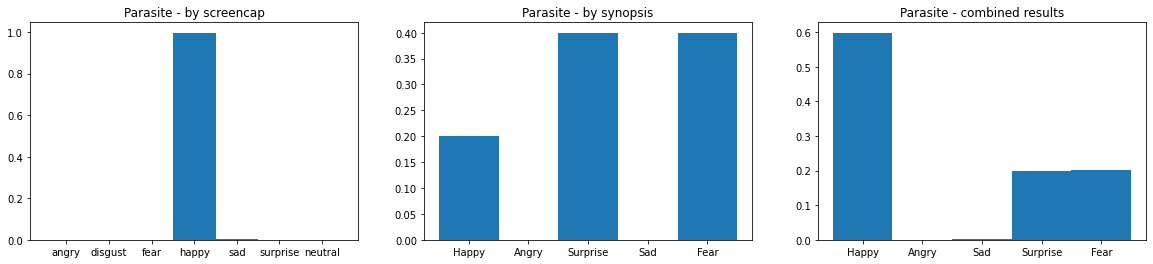

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/parasite-2019-262-17182.jpg")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "Greed and class discrimination threaten the newly formed symbiotic relationship between the wealthy Park family and the destitute Kim clan."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("Parasite - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("Parasite - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("Parasite - combined results")

plt.show()

Emotion: angry Score: 0.0495477169752121
Emotion: disgust Score: 0.0005399502697400749
Emotion: fear Score: 0.05740092694759369
Emotion: happy Score: 0.0011851630406454206
Emotion: sad Score: 0.21256126463413239
Emotion: surprise Score: 8.051694021560252e-05
Emotion: neutral Score: 0.6786844730377197
Most dominant Emotion: neutral


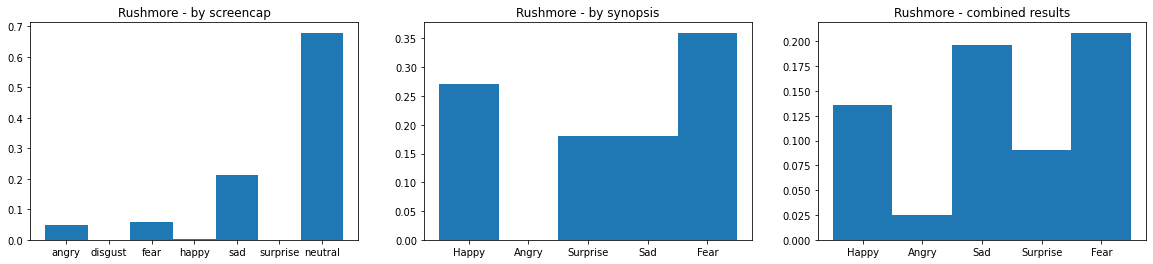

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/rushmore-1998-3773.png")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "When a beautiful first-grade teacher (Olivia Williams) arrives at a prep school, she soon attracts the attention of an ambitious teenager named Max (Jason Schwartzman), who quickly falls in love with her. Max turns to the father (Bill Murray) of two of his schoolmates for advice on how to woo the teacher. However, the situation soon gets complicated when Max's new friend becomes involved with her, setting the two pals against one another in a war for her attention."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("Rushmore - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("Rushmore - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("Rushmore - combined results")

plt.show()

Emotion: angry Score: 1.3653615269504371e-06
Emotion: disgust Score: 7.687840815340241e-12
Emotion: fear Score: 0.7691404223442078
Emotion: happy Score: 1.8707396742811966e-10
Emotion: sad Score: 0.23085811734199524
Emotion: surprise Score: 9.274632783981876e-16
Emotion: neutral Score: 1.0054145604954101e-07
Most dominant Emotion: fear


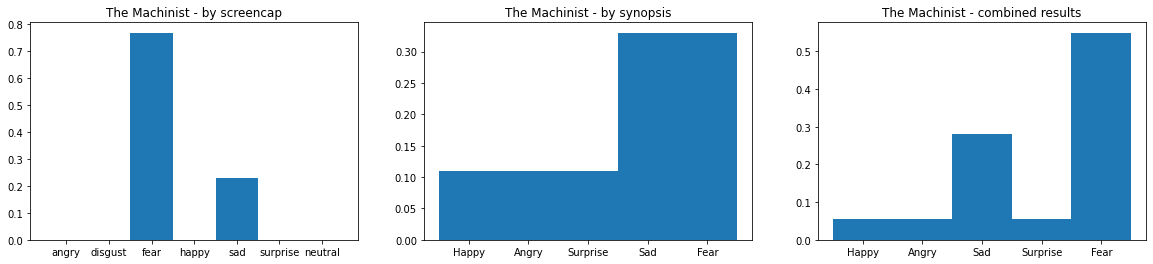

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/the-machinist-2004-5494.png")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "Factory worker Trevor Reznik (Christian Bale) suffers from insomnia so severe that his condition has taken its toll on his weight and his mental health. When Trevor unintentionally causes an on-the-job accident that horribly injures a coworker (Michael Ironside), he begins to become even more troubled. Despite a relationship with Stevie (Jennifer Jason Leigh), a pretty prostitute, Trevor descends further into paranoia, blaming his problems on an enigmatic figure named Ivan (John Sharian)."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("The Machinist - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("The Machinist - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("The Machinist - combined results")

plt.show()

Emotion: angry Score: 0.006283255111665142
Emotion: disgust Score: 5.0779655480974735e-06
Emotion: fear Score: 0.01763358363611503
Emotion: happy Score: 4.067006496434875e-05
Emotion: sad Score: 0.960465664919098
Emotion: surprise Score: 5.486674325902074e-06
Emotion: neutral Score: 0.015566319220223335
Most dominant Emotion: sad


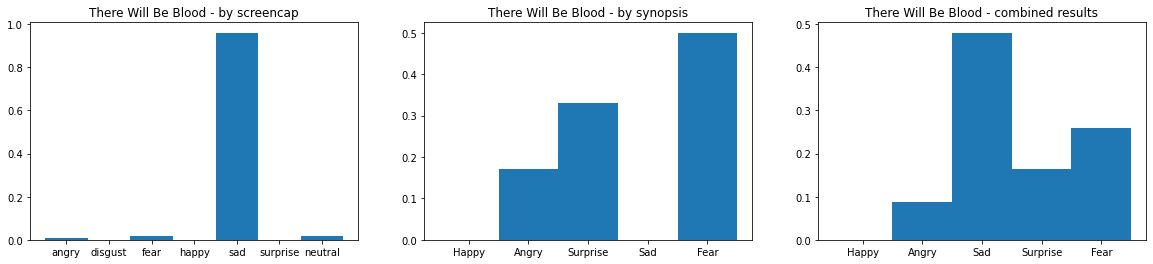

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/movie_stills/there-will-be-blood-2007-14900.jpg")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "Ruthless silver miner, turned oil prospector, Daniel Plainview moves to oil-rich California. Using his adopted son HW to project a trustworthy, family-man image, Plainview cons local landowners into selling him their valuable properties for a pittance. However, local preacher Eli Sunday suspects Plainviews motives and intentions, starting a slow-burning feud that threatens both their lives."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("There Will Be Blood - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("There Will Be Blood - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("There Will Be Blood - combined results")

plt.show()

Emotion: angry Score: 0.010344062000513077
Emotion: disgust Score: 2.0578202963861258e-07
Emotion: fear Score: 0.0005300623015500605
Emotion: happy Score: 1.8122209439752623e-05
Emotion: sad Score: 0.9890934228897095
Emotion: surprise Score: 7.617497604917034e-11
Emotion: neutral Score: 1.416010309185367e-05
Most dominant Emotion: sad


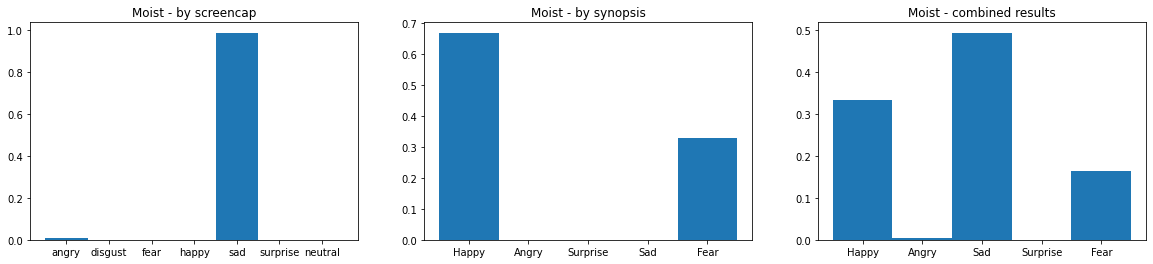

In [ ]:
# Grab the pictures
pictures = glob.glob("/content/drive/MyDrive/Colab/moist.jpg")

# set up the dictionary
emotionsList = dict()
for emo in obj['emotion'].keys():
  emotionsList[emo] = 0
dominantEmotion = list()

# use deepFace to analyze the emotion from each image
for picture in pictures:
  obj = DeepFace.analyze(img_path = picture, actions = ['emotion'], enforce_detection=False)
  for emo in obj['emotion'].keys():
    emotionsList[emo]+=(obj['emotion'][emo])
  dominantEmotion.append(obj['dominant_emotion'])

for emotion in emotionsList.keys():
  emotionsList[emotion]=(emotionsList[emotion]/len(pictures))/100
  print("Emotion: {} Score: {}".format(emotion,emotionsList[emotion]))


# get the most dominant emotion
max = emotionsList['angry']
maxEmo = 'angry'
for emo in emotionsList.keys():
  if emotionsList[emo] > max:
    max = emotionsList[emo]
    maxEmo = emo
print("Most dominant Emotion: {}".format(maxEmo))



# use text2emotion to get the emotion from the synopsis
synopsis = "A long haired man showing mock happiness for a child's toy. He is overexagerating how happy he is."
synopsisDict = te.get_emotion(synopsis)

for emotion in synopsisDict.keys():
  synopsisDict[emotion]=synopsisDict[emotion]



# combine the results to get the main 5 emotions
mixDict = {'Happy': 0, 'Angry': 0, 'Sad': 0, 'Surprise': 0, 'Fear': 0}
mixDict['Happy'] = (emotionsList['happy']+synopsisDict['Happy'])/2
mixDict['Angry'] = (emotionsList['angry']+synopsisDict['Angry'])/2
mixDict['Sad'] = (emotionsList['sad']+synopsisDict['Sad'])/2
mixDict['Surprise'] = (emotionsList['surprise']+synopsisDict['Surprise'])/2
mixDict['Fear'] = (emotionsList['fear']+synopsisDict['Fear'])/2



# show the results
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.bar(emotionsList.keys(), emotionsList.values(), width)
plt.title("Moist - by screencap")


plt.subplot(132)
plt.bar(synopsisDict.keys(), synopsisDict.values(), width)
plt.title("Moist - by synopsis")

plt.subplot(133)
plt.bar(mixDict.keys(), mixDict.values(), width)
plt.title("Moist - combined results")

plt.show()